In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

df_customers= pd.read_csv("dataset/customers.csv")
df_loans= pd.read_csv("dataset/loans.csv")
df_bureau= pd.read_csv("dataset/bureau_data.csv")

In [2]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [3]:
df_customers.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

         state  zipcode  
0        Delhi   110001  
1   Tamil Nadu   600001  
2  West Bengal   700001

In [4]:
df_loans.head(3)

loan_id cust_id loan_purpose  loan_type  sanction_amount  loan_amount  \
0  L00001  C00001         Auto    Secured          3004000      2467000   
1  L00002  C00002         Home    Secured          4161000      3883000   
2  L00003  C00003     Personal  Unsecured          2401000      2170000   

   processing_fee     gst  net_disbursement  loan_tenure_months  \
0        49340.00  444060           1973600                  33   
1        77660.00  698940           3106400                  30   
2        43400.00  390600           1736000                  21   

   principal_outstanding  bank_balance_at_application disbursal_date  \
0                1630408                       873386     2019-07-24   
1                 709309                       464100     2019-07-24   
2                1562399                      1476042     2019-07-24   

  installment_start_dt  default  
0           2019-08-10    False  
1           2019-08-15    False  
2           2019-08-21    False

In [5]:
df= pd.merge(df_customers, df_loans, on= 'cust_id')
df.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

   ... loan_amount  processing_fee     gst net_disbursement  \
0  ...     2467000        49340.00  444060          1973600   
1  ...     3883000        77660.00  698940          3106400   
2  ...     2170000        43400.00  390600          1736000   

  loan_tenure_months  principal_outstanding  bank_balance_at_application  \
0                 33                1630408                       873386   
1                 30                 709309                       464100   
2                 21                1562399                      1476042   

   disbursal_date  installment_start_dt  default  
0      2019-07-24            2019-08-10    False  
1      2019-07-24            2019-08-15    False  
2      2019-07-24            2019-08-21    False  

[3 rows x 26 columns]

In [6]:
df_bureau.head(3)

cust_id  number_of_open_accounts  number_of_closed_accounts  \
0  C00001                        1                          1   
1  C00002                        3                          1   
2  C00003                        2                          1   

   total_loan_months  delinquent_months  total_dpd  enquiry_count  \
0                 42                  0          0              3   
1                 96                 12         60              5   
2                 82                 24        147              6   

   credit_utilization_ratio  
0                         7  
1                         4  
2                        58

In [7]:
df = pd.merge(df, df_bureau, on= 'cust_id')

In [8]:
df.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

   ... disbursal_date  installment_start_dt default number_of_open_accounts  \
0  ...     2019-07-24            2019-08-10   False                       1   
1  ...     2019-07-24            2019-08-15   False                       3   
2  ...     2019-07-24            2019-08-21   False                       2   

  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  \
0                         1                 42                  0          0   
1                         1                 96                 12         60   
2                         1                 82                 24        147   

   enquiry_count  credit_utilization_ratio  
0              3                         7  
1              5                         4  
2              6                        58  

[3 rows x 33 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default']= df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X= df.drop("default", axis= "columns")
y= df["default"]

X_train, X_test, y_train, y_test= train_test_split(X, y, stratify= y, test_size= 0.25, random_state= 42)

df_train= pd.concat([X_train, y_train], axis= "columns")
df_test= pd.concat([X_test, y_test], axis= "columns")


<h4>To avoid Data Leakage, will use only train dataset</h4>

In [12]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [14]:
mode_residence= df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [15]:
df_train.residence_type.fillna(mode_residence, inplace= True)
df_train.residence_type.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17168\837790855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace= True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [16]:
df_test.residence_type.fillna(mode_residence, inplace= True)
df_test.residence_type.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17168\3079423523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace= True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
df_train.duplicated().sum()

np.int64(0)

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [20]:
numeric_cols = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

categorical_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

<h3>BoxPlot to visualize outliers</h3>

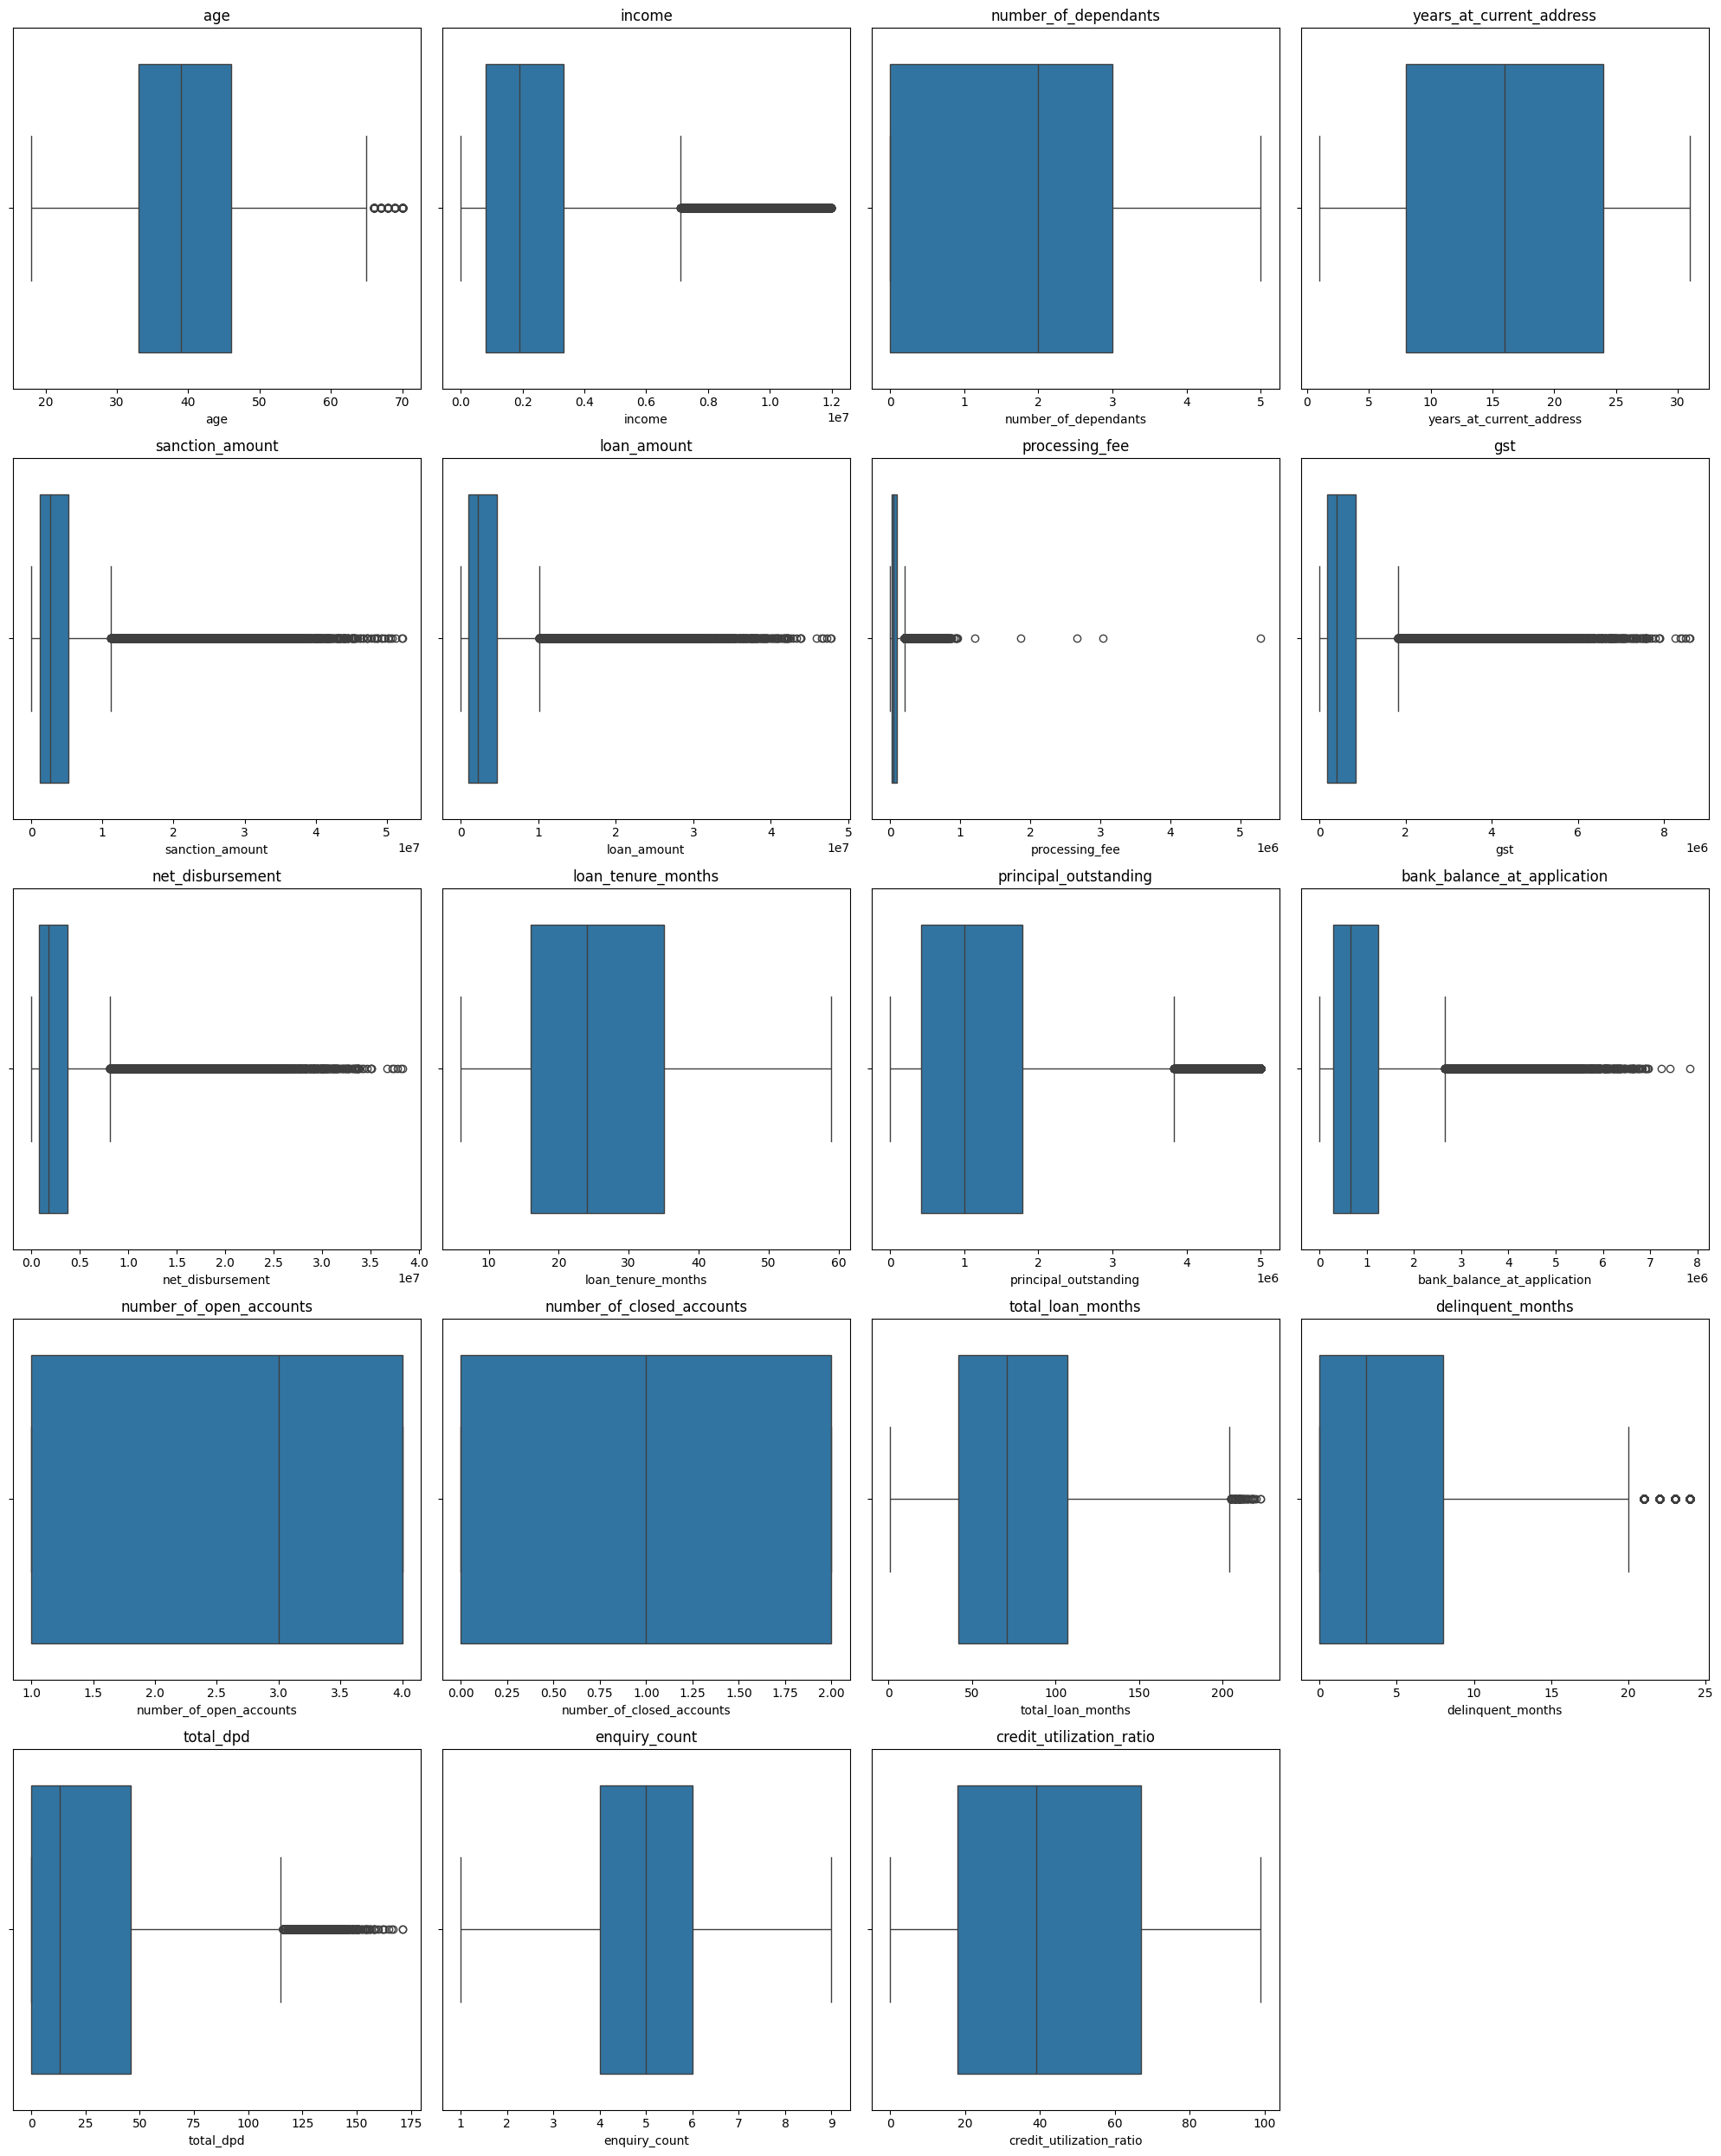

In [21]:
num_plots = len(numeric_cols)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

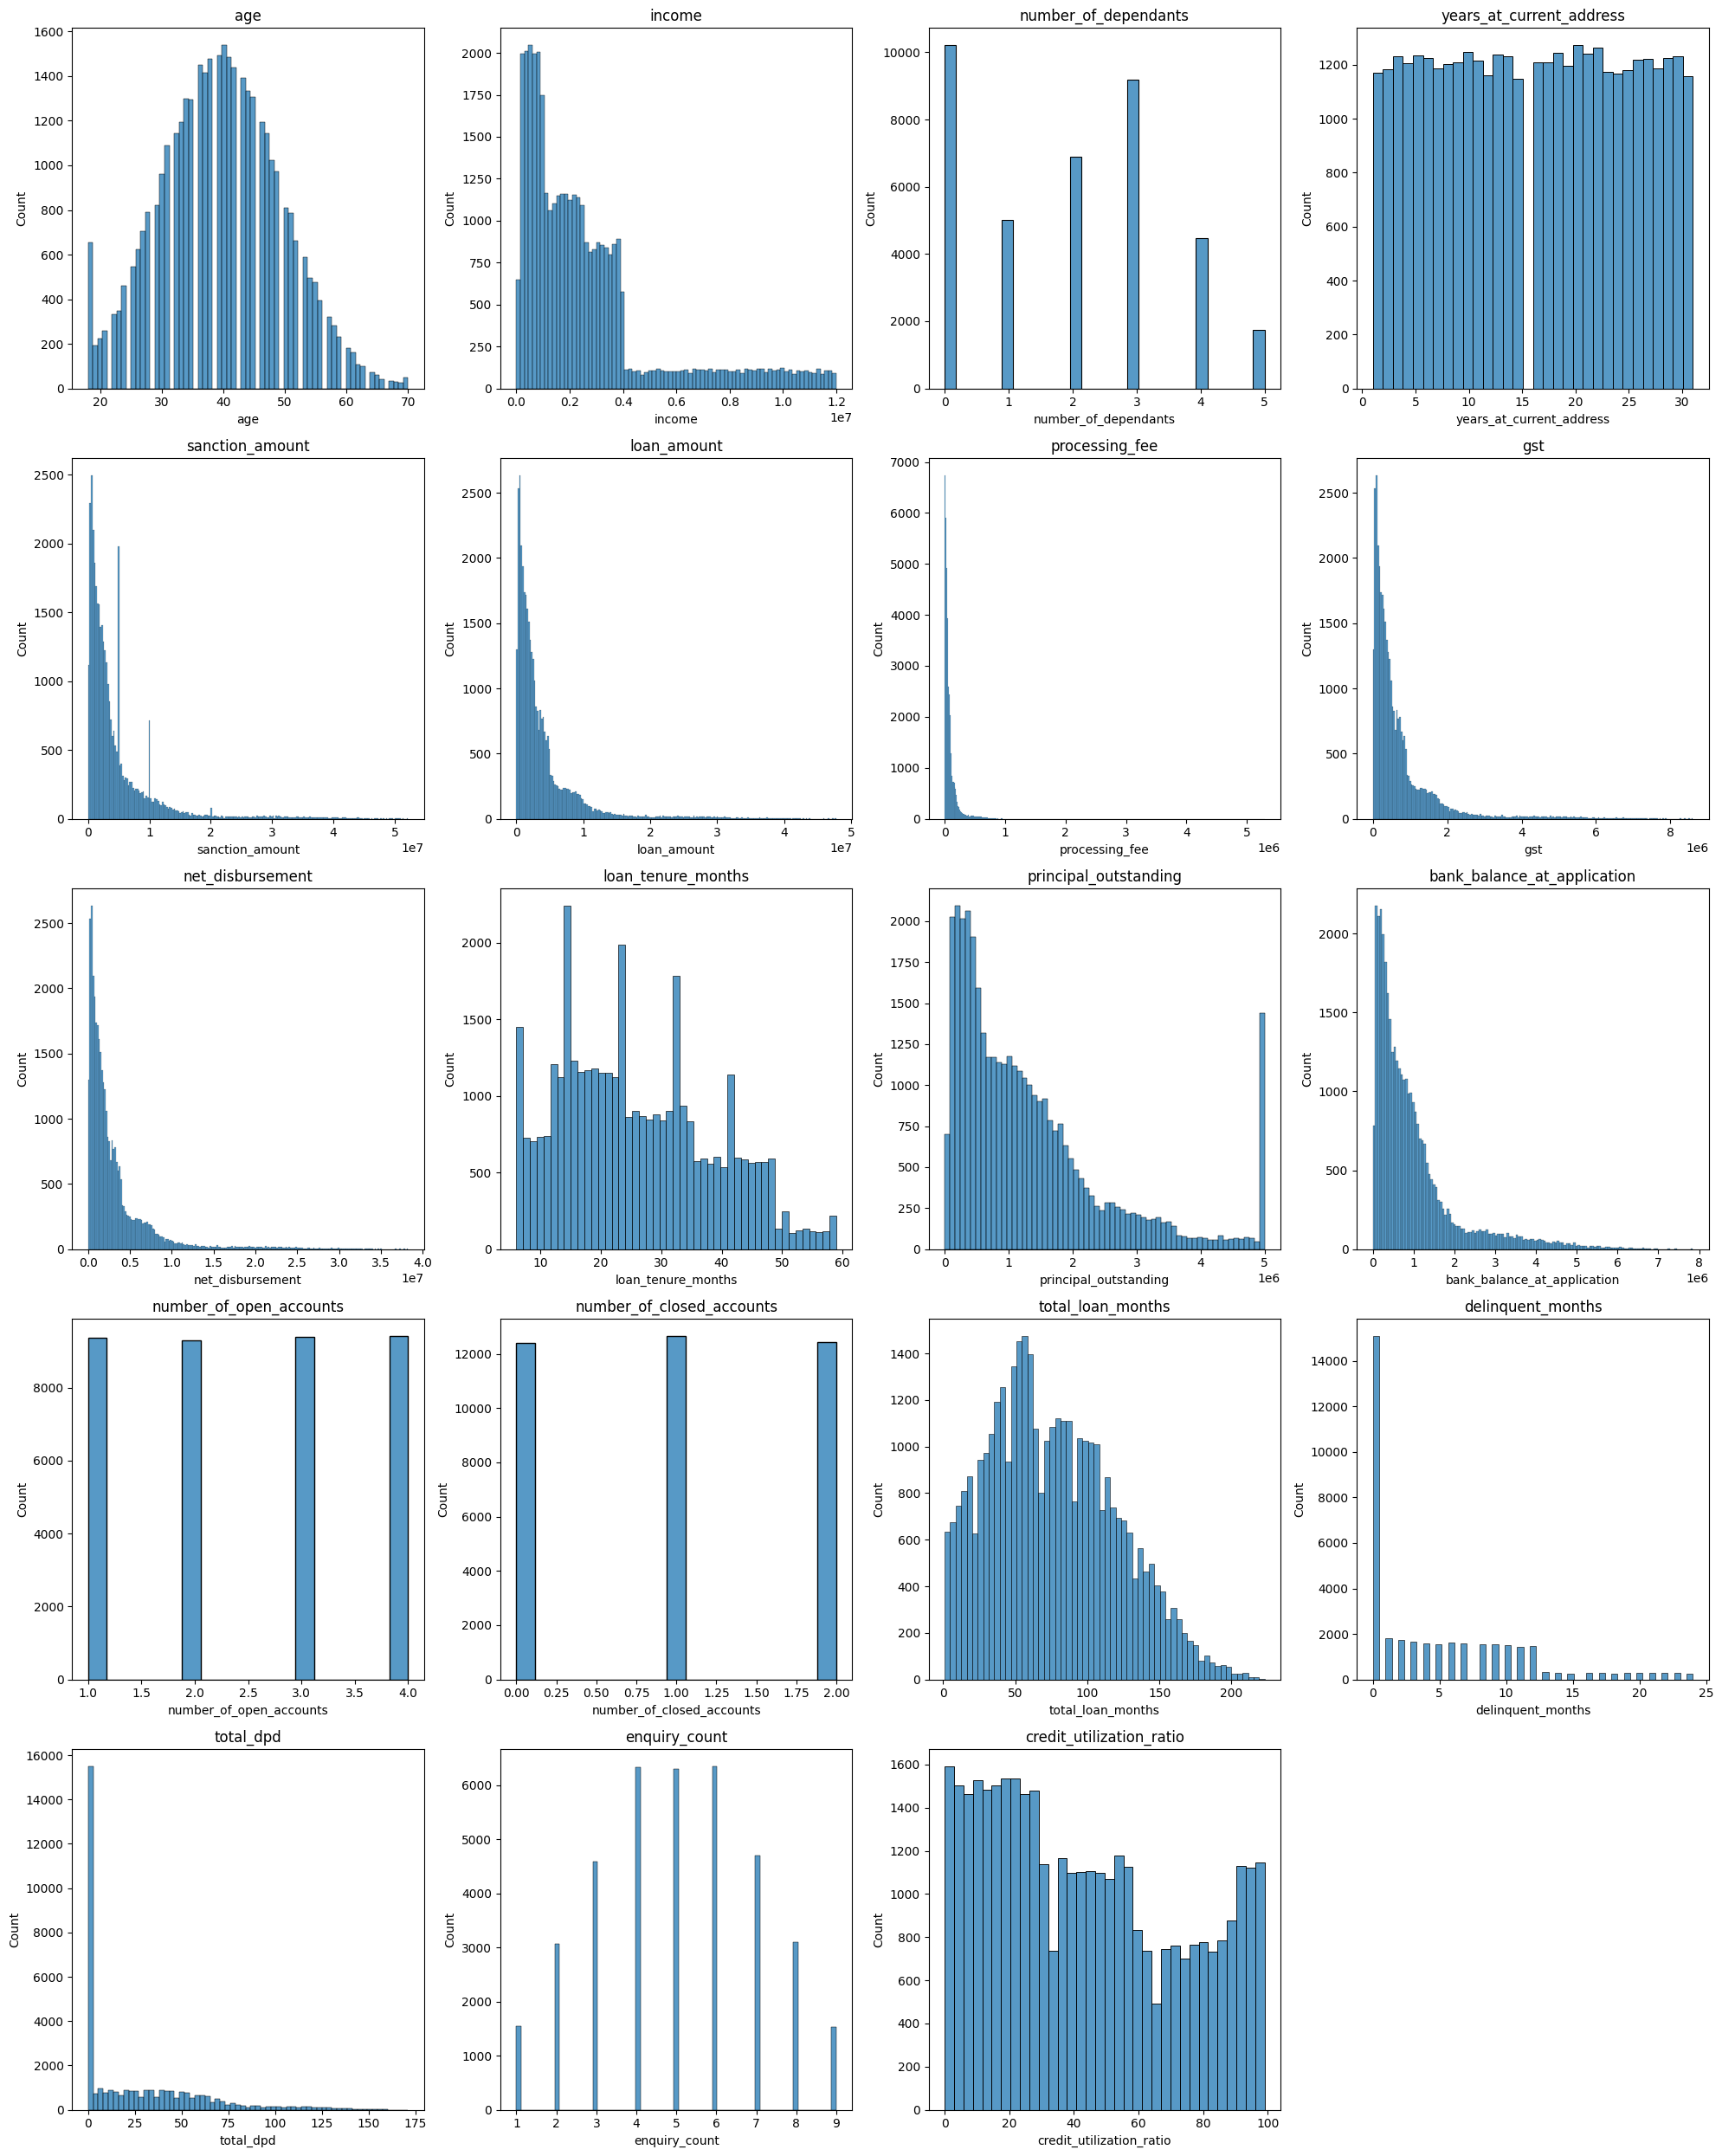

In [22]:
num_plots = len(numeric_cols)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [23]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [24]:
df_train[df_train.processing_fee == df_train.processing_fee.max()][["loan_amount", "processing_fee"]]

loan_amount  processing_fee
9898      3626000      5293543.52

In [25]:
df_train[df_train.processing_fee > df_train.loan_amount][["loan_amount", "processing_fee"]]

loan_amount  processing_fee
23981      2234000      2669791.02
28174       966000      1214492.67
47089      1738000      1858964.77
29305      2616000      3036378.01
9898       3626000      5293543.52

In [26]:
# processing fee greater than 3% of loan_amount is an outlier
df_train[(df_train.processing_fee/ df_train.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

loan_amount  processing_fee
23981      2234000      2669791.02
28174       966000      1214492.67
47089      1738000      1858964.77
29305      2616000      3036378.01
9898       3626000      5293543.52

In [27]:
df_train1= df_train[(df_train.processing_fee/ df_train.loan_amount) < 0.03].copy()
df_train1[(df_train.processing_fee/ df_train.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17168\2711439216.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train1[(df_train.processing_fee/ df_train.loan_amount) > 0.03][["loan_amount", "processing_fee"]]


Empty DataFrame
Columns: [loan_amount, processing_fee]
Index: []

In [28]:
#apply same step on test
df_test1= df_test[(df_test.processing_fee/ df_test.loan_amount) < 0.03].copy()

In [29]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [30]:
for col in categorical_cols:
    print(col, "---", df_train1[col].unique())

gender --- ['M' 'F']
marital_status --- ['Married' 'Single']
employment_status --- ['Self-Employed' 'Salaried']
residence_type --- ['Owned' 'Mortgage' 'Rented']
city --- ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --- ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --- [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --- ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --- ['Secured' 'Unsecured']
default --- [0 1]


In [31]:
df_train1['loan_purpose']= df_train1['loan_purpose'].replace('Personaal', 'Personal')
df_test1['loan_purpose']= df_test1['loan_purpose'].replace('Personaal', 'Personal')

df_train1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [32]:
#gst must not be more than 20%
df_train1[(df_train1.gst/ df_train1.loan_amount) > 0.2]

Empty DataFrame
Columns: [cust_id, age, gender, marital_status, employment_status, income, number_of_dependants, residence_type, years_at_current_address, city, state, zipcode, loan_id, loan_purpose, loan_type, sanction_amount, loan_amount, processing_fee, gst, net_disbursement, loan_tenure_months, principal_outstanding, bank_balance_at_application, disbursal_date, installment_start_dt, number_of_open_accounts, number_of_closed_accounts, total_loan_months, delinquent_months, total_dpd, enquiry_count, credit_utilization_ratio, default]
Index: []

[0 rows x 33 columns]

In [33]:
#sanction_amount must be higher than loan_amount
df_train1[df_train1.sanction_amount < df_train1.loan_amount]

Empty DataFrame
Columns: [cust_id, age, gender, marital_status, employment_status, income, number_of_dependants, residence_type, years_at_current_address, city, state, zipcode, loan_id, loan_purpose, loan_type, sanction_amount, loan_amount, processing_fee, gst, net_disbursement, loan_tenure_months, principal_outstanding, bank_balance_at_application, disbursal_date, installment_start_dt, number_of_open_accounts, number_of_closed_accounts, total_loan_months, delinquent_months, total_dpd, enquiry_count, credit_utilization_ratio, default]
Index: []

[0 rows x 33 columns]

<h3 align= "center" style= "color: red">Exploratory Data Analysis</h3>

In [34]:
numeric_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Count'>

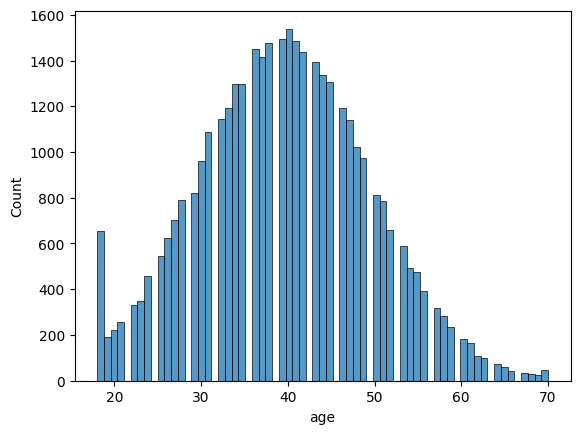

In [35]:
sns.histplot(df_train1.age)

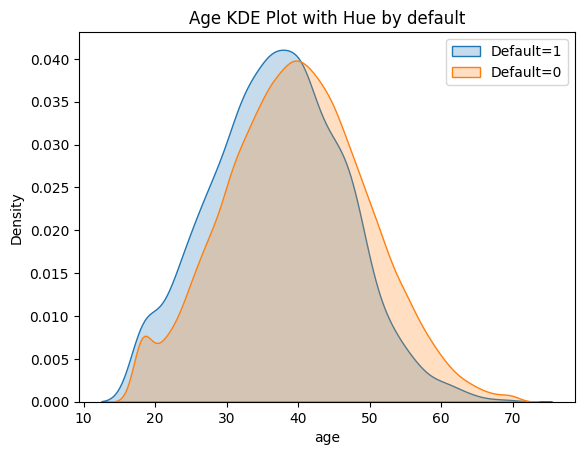

In [36]:
#continous curve
sns.kdeplot(df_train1[df_train1.default==1]['age'], fill= True, label= "Default=1")
sns.kdeplot(df_train1[df_train1.default==0]['age'], fill= True, label= "Default=0")
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights
1. Blue graph is little bit shifted to the left of Orange graph, which indicates that people with young age are more likely to default

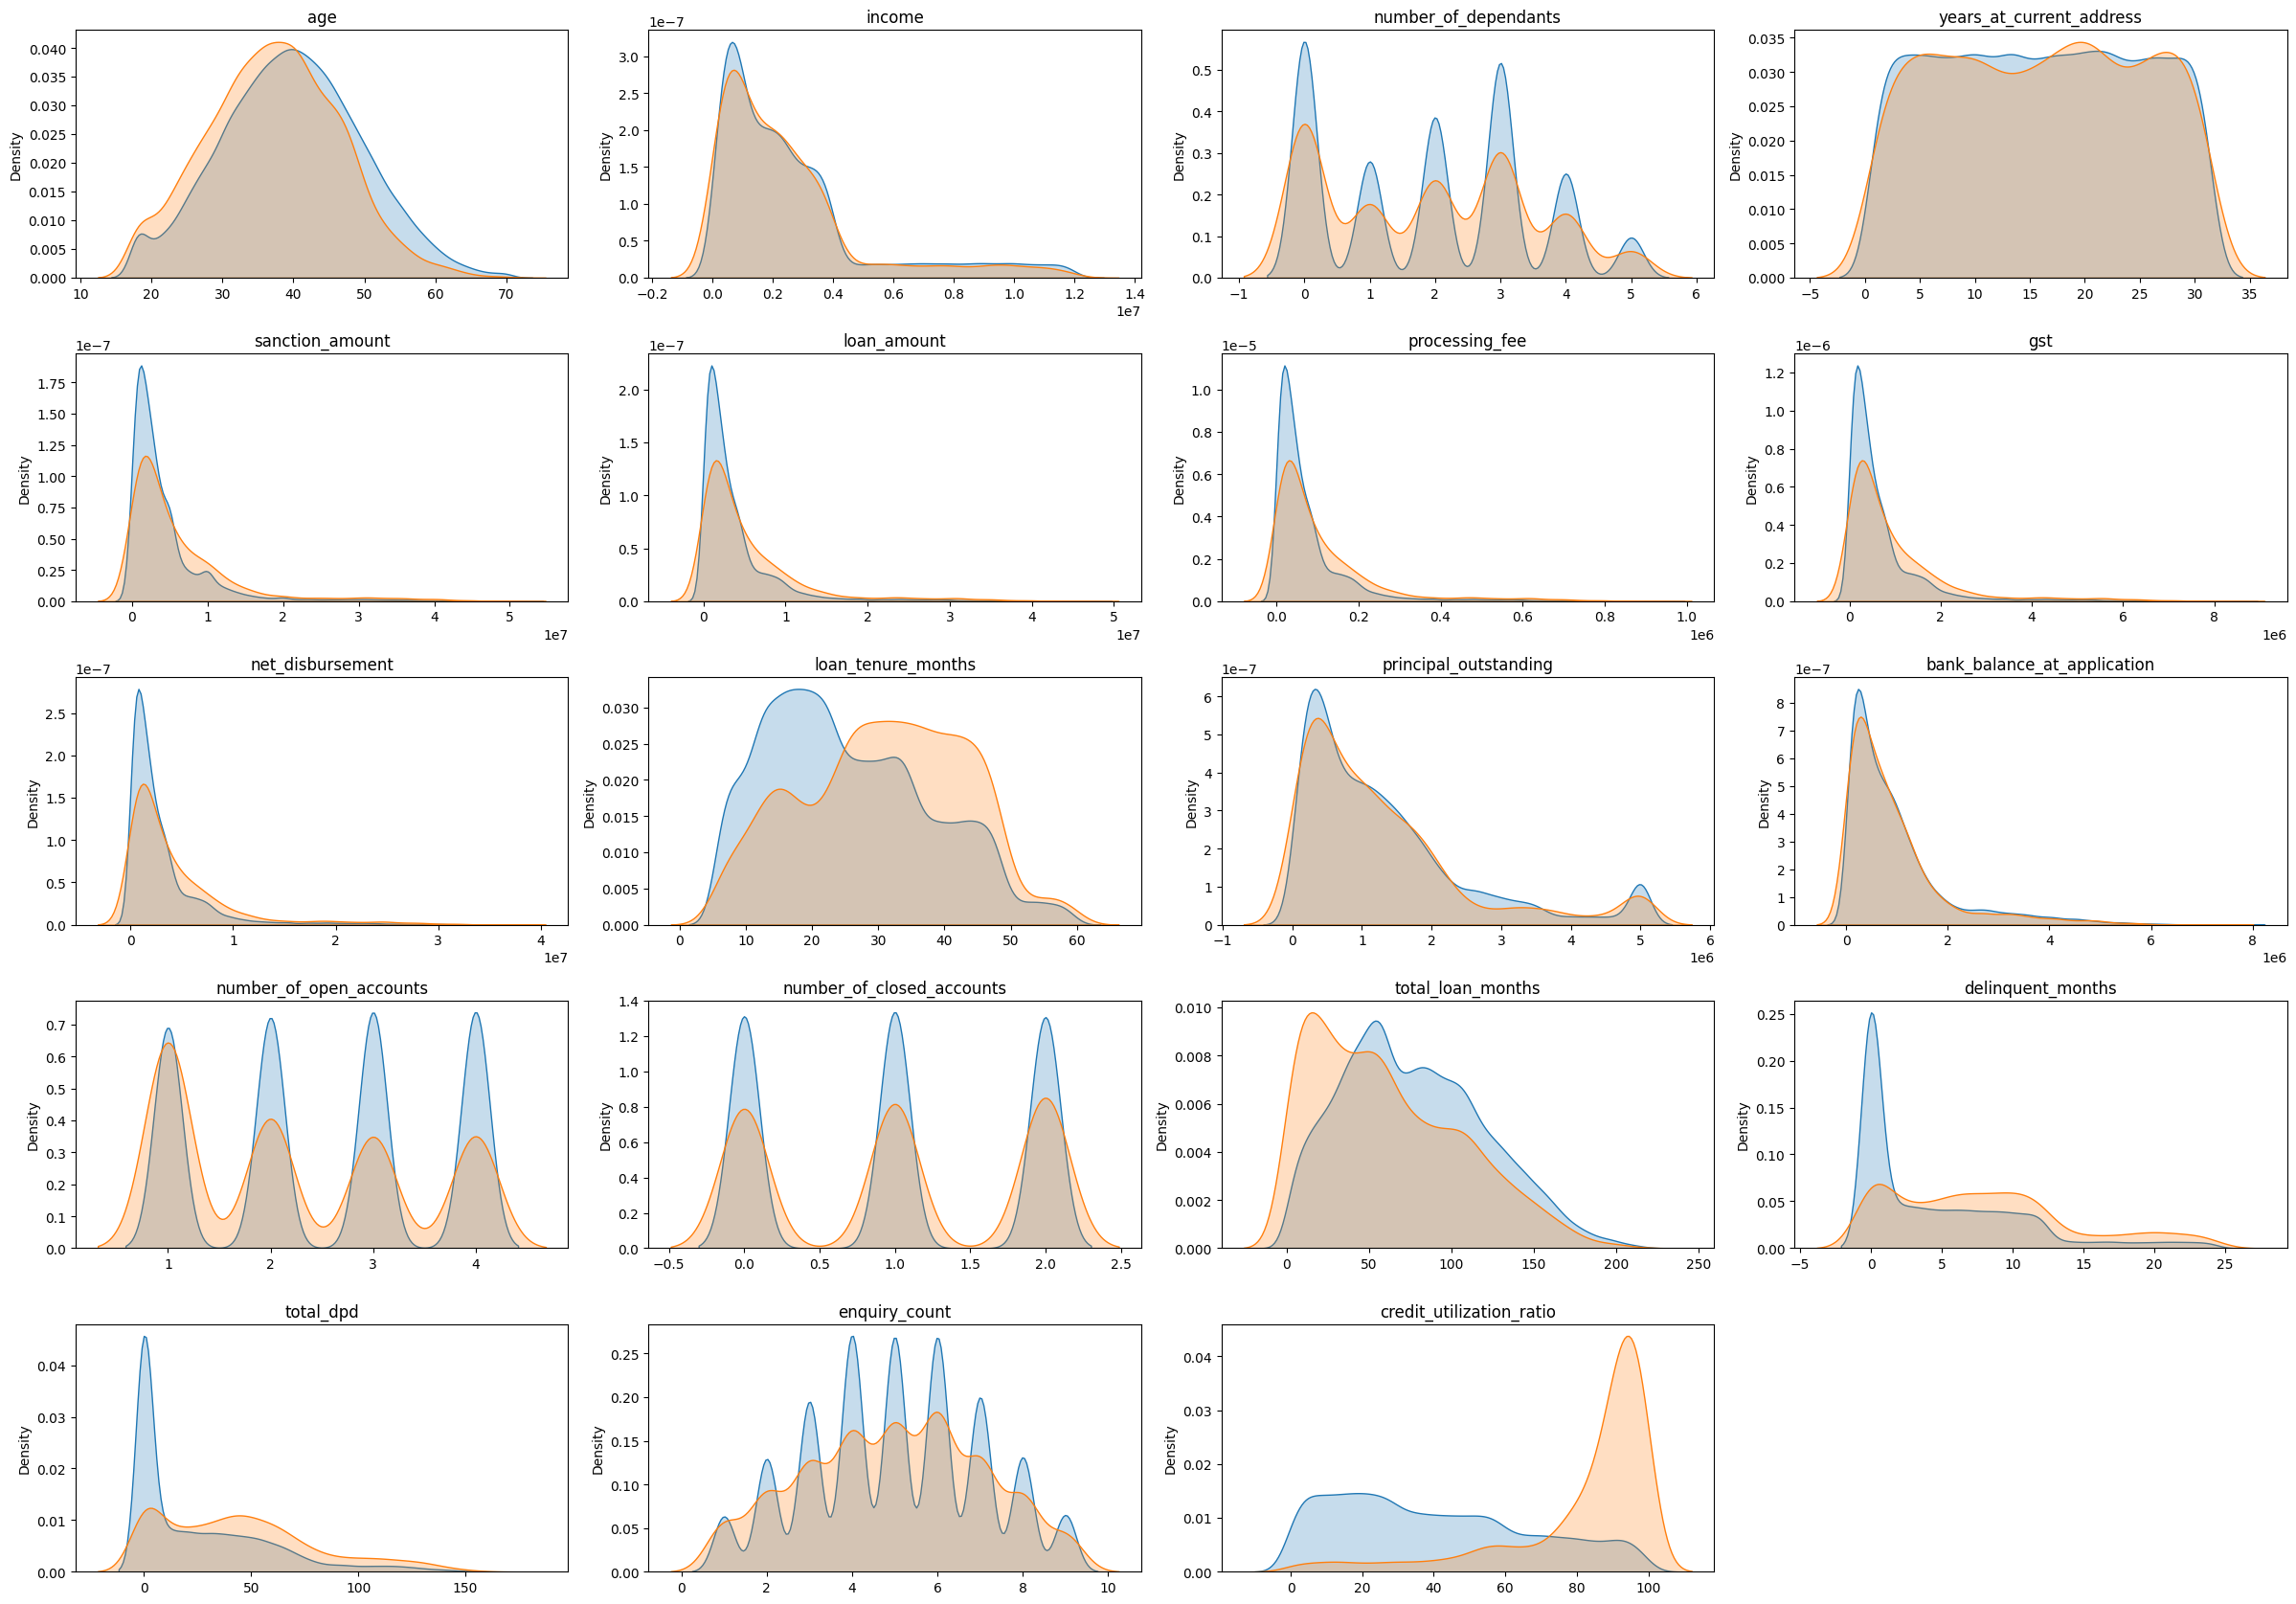

In [37]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(numeric_cols):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train1[col][df_train1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train1[col][df_train1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Insights
1. In columns: credit_utilization_ratio, delinquent_months, loan_tenure_months, total_dpd, here higher values indicates becoming a default. 
    Hence these 4 looks like strong predictors
2. In remaining cols the distribution do not give any clear insights
3. Why loan_amount, and income did not give any signs of being strong predicators? May be when we combine these two and get 
   loan to income ratio (LTI), that may have influence on the target variable. Will explore later

<h3>Feature Engineering</h3>

In [38]:
df_train1["loan_to_income"]= round(df_train1['loan_amount']/df_train1['income'], 2)
df_test1["loan_to_income"]= round(df_test1['loan_amount']/df_test1['income'], 2)
df_train1["loan_to_income"].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

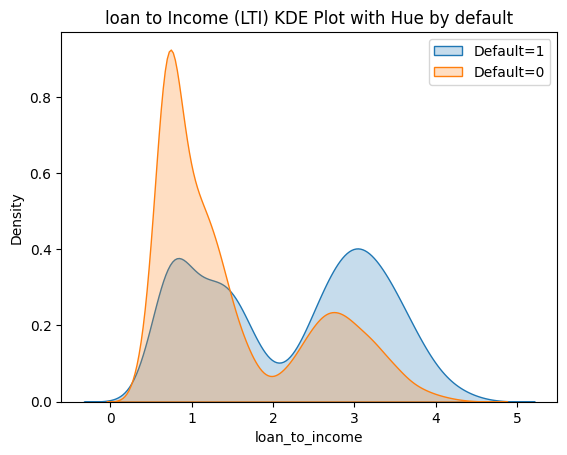

In [39]:
#continous curve
sns.kdeplot(df_train1[df_train1.default==1]["loan_to_income"], fill= True, label= "Default=1")
sns.kdeplot(df_train1[df_train1.default==0]["loan_to_income"], fill= True, label= "Default=0")
plt.title(f"loan to Income (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [40]:
df_train1["delinquent_months to total_loan_months"]= round(df_train1['delinquent_months'] * 100/ df_train1['total_loan_months'], 1)
df_test1["delinquent_months to total_loan_months"]= round(df_test1['delinquent_months'] * 100/ df_test1['total_loan_months'], 1)
df_train1["delinquent_months to total_loan_months"].describe()

count   37488.00
mean       10.33
std        17.30
min         0.00
25%         0.00
50%         3.70
75%        12.90
max       100.00
Name: delinquent_months to total_loan_months, dtype: float64

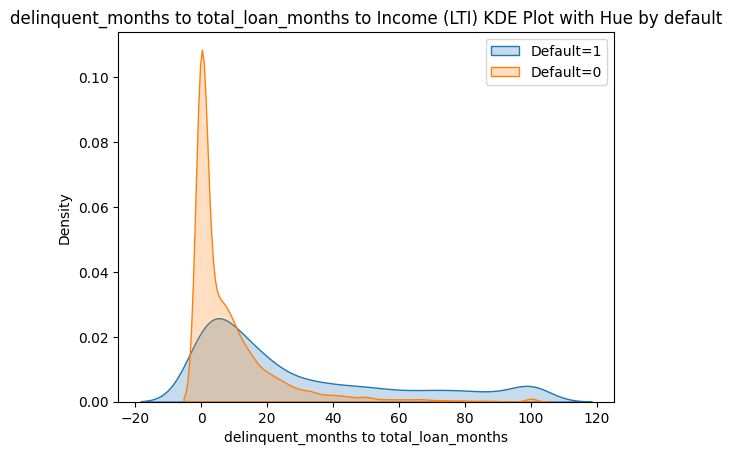

In [41]:
#continous curve
sns.kdeplot(df_train1[df_train1.default==1]["delinquent_months to total_loan_months"], fill= True, label= "Default=1")
sns.kdeplot(df_train1[df_train1.default==0]["delinquent_months to total_loan_months"], fill= True, label= "Default=0")
plt.title(f"delinquent_months to total_loan_months to Income (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [42]:
#delinquent_months can be 0, so
df_train1['avg_dpd_per_delinquency']= np.where(
    df_train1['delinquent_months'] != 0,
    round(df_train1['total_dpd'] / df_train1['delinquent_months'], 1),
    0
)

df_test1['avg_dpd_per_delinquency']= np.where(
    df_test1['delinquent_months'] != 0,
    round(df_test1['total_dpd'] / df_test1['delinquent_months'], 1),
    0
)

df_train1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

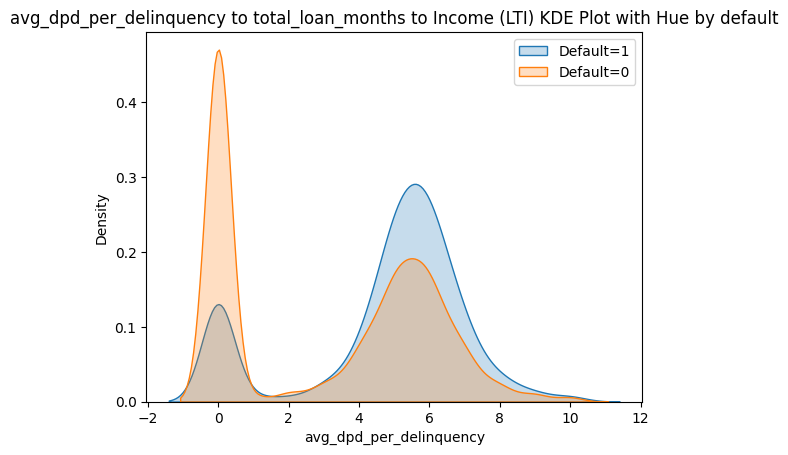

In [43]:
#continous curve
sns.kdeplot(df_train1[df_train1.default==1]['avg_dpd_per_delinquency'], fill= True, label= "Default=1")
sns.kdeplot(df_train1[df_train1.default==0]['avg_dpd_per_delinquency'], fill= True, label= "Default=0")
plt.title(f"avg_dpd_per_delinquency to total_loan_months to Income (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

<h4>Feature Selection</h3>

In [44]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_months to total_loan_months',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [45]:
df_train2 = df_train1.drop(['cust_id', 'loan_id', 'disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test2 = df_test1.drop(['cust_id', 'loan_id', 'disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

In [46]:
df_train2.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months to total_loan_months', 'avg_dpd_per_delinquency'],
      dtype='object')

<h4>Finding Collinearity using VIF</h4>

In [47]:
df_train2.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months to total_loan_months', 'avg_dpd_per_delinquency'],
      dtype='object')

In [48]:
X_train= df_train2.drop('default', axis= 'columns')
y_train= df_train2['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(["int64", "float64"]).columns.drop('zipcode')

scale= MinMaxScaler()
X_train[cols_to_scale] = scale.fit_transform(X_train[cols_to_scale])
X_train.describe()

age  number_of_dependants  years_at_current_address   zipcode  \
count 37488.00              37488.00                  37488.00  37488.00   
mean      0.41                  0.39                      0.50 418876.24   
std       0.19                  0.31                      0.30 169029.87   
min       0.00                  0.00                      0.00 110001.00   
25%       0.29                  0.00                      0.23 302001.00   
50%       0.40                  0.40                      0.50 400001.00   
75%       0.54                  0.60                      0.77 560001.00   
max       1.00                  1.00                      1.00 700001.00   

       sanction_amount  processing_fee      gst  net_disbursement  \
count         37488.00        37488.00 37488.00          37488.00   
mean              0.09            0.08     0.08              0.08   
std               0.12            0.11     0.11              0.11   
min               0.00            0.00     0.00              0.00   
25%               0.02            0.02     0.02              0.02   
50%               0.05            0.05     0.05              0.05   
75%               0.10            0.10     0.10              0.10   
max               1.00            1.00     1.00              1.00   

       loan_tenure_months  principal_outstanding  bank_balance_at_application  \
count            37488.00               37488.00                     37488.00   
mean                 0.38                   0.26                         0.12   
std                  0.23                   0.24                         0.13   
min                  0.00                   0.00                         0.00   
25%                  0.19                   0.08                         0.03   
50%                  0.34                   0.19                         0.08   
75%                  0.55                   0.35                         0.16   
max                  1.00                   1.00                         1.00   

       number_of_open_accounts  number_of_closed_accounts  enquiry_count  \
count                 37488.00                   37488.00       37488.00   
mean                      0.50                       0.50           0.50   
std                       0.37                       0.41           0.25   
min                       0.00                       0.00           0.00   
25%                       0.00                       0.00           0.38   
50%                       0.67                       0.50           0.50   
75%                       1.00                       1.00           0.62   
max                       1.00                       1.00           1.00   

       credit_utilization_ratio  loan_to_income  \
count                  37488.00        37488.00   
mean                       0.44            0.29   
std                        0.30            0.23   
min                        0.00            0.00   
25%                        0.18            0.11   
50%                        0.39            0.20   
75%                        0.68            0.51   
max                        1.00            1.00   

       delinquent_months to total_loan_months  avg_dpd_per_delinquency  
count                                37488.00                 37488.00  
mean                                     0.10                     0.33  
std                                      0.17                     0.29  
min                                      0.00                     0.00  
25%                                      0.00                     0.00  
50%                                      0.04                     0.43  
75%                                      0.13                     0.57  
max                                      1.00                     1.00

In [49]:
X_test= df_test2.drop('default', axis= 'columns')
y_test= df_test2['default']

cols_to_scale = X_test.select_dtypes(["int64", "float64"]).columns.drop('zipcode')

X_test[cols_to_scale] = scale.transform(X_test[cols_to_scale])
X_test.describe()

age  number_of_dependants  years_at_current_address   zipcode  \
count 12497.00              12497.00                  12497.00  12497.00   
mean      0.42                  0.38                      0.50 419759.82   
std       0.19                  0.31                      0.30 168845.35   
min       0.00                  0.00                      0.00 110001.00   
25%       0.29                  0.00                      0.23 302001.00   
50%       0.42                  0.40                      0.50 411001.00   
75%       0.54                  0.60                      0.77 560001.00   
max       1.00                  1.00                      1.00 700001.00   

       sanction_amount  processing_fee      gst  net_disbursement  \
count         12497.00        12497.00 12497.00          12497.00   
mean              0.09            0.08     0.08              0.08   
std               0.12            0.11     0.11              0.11   
min              -0.00           -0.00    -0.00             -0.00   
25%               0.02            0.02     0.02              0.02   
50%               0.05            0.05     0.05              0.05   
75%               0.10            0.09     0.09              0.09   
max               0.98            0.96     0.96              0.96   

       loan_tenure_months  principal_outstanding  bank_balance_at_application  \
count            12497.00               12497.00                     12497.00   
mean                 0.38                   0.26                         0.12   
std                  0.23                   0.25                         0.13   
min                  0.00                   0.00                         0.00   
25%                  0.19                   0.08                         0.03   
50%                  0.34                   0.20                         0.08   
75%                  0.55                   0.36                         0.16   
max                  1.00                   1.00                         0.94   

       number_of_open_accounts  number_of_closed_accounts  enquiry_count  \
count                 12497.00                   12497.00       12497.00   
mean                      0.50                       0.50           0.50   
std                       0.37                       0.41           0.25   
min                       0.00                       0.00           0.00   
25%                       0.00                       0.00           0.38   
50%                       0.33                       0.50           0.50   
75%                       0.67                       1.00           0.62   
max                       1.00                       1.00           1.00   

       credit_utilization_ratio  loan_to_income  \
count                  12497.00        12497.00   
mean                       0.44            0.29   
std                        0.30            0.23   
min                        0.00            0.00   
25%                        0.18            0.11   
50%                        0.39            0.20   
75%                        0.68            0.50   
max                        1.00            1.00   

       delinquent_months to total_loan_months  avg_dpd_per_delinquency  
count                                12497.00                 12497.00  
mean                                     0.11                     0.33  
std                                      0.17                     0.29  
min                                      0.00                     0.00  
25%                                      0.00                     0.00  
50%                                      0.04                     0.44  
75%                                      0.13                     0.58  
max                                      1.00                     1.00

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif= pd.DataFrame()
    vif['column']= data.columns
    vif['VIF']= [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

In [51]:
calc_vif(X_train[cols_to_scale])

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


column    VIF
0                                      age   5.55
1                     number_of_dependants   2.72
2                 years_at_current_address   3.36
3                          sanction_amount 101.08
4                           processing_fee    inf
5                                      gst    inf
6                         net_disbursement    inf
7                       loan_tenure_months   6.17
8                    principal_outstanding  16.32
9              bank_balance_at_application   9.33
10                 number_of_open_accounts   4.38
11               number_of_closed_accounts   2.36
12                           enquiry_count   6.33
13                credit_utilization_ratio   2.90
14                          loan_to_income   6.89
15  delinquent_months to total_loan_months   1.93
16                 avg_dpd_per_delinquency   2.90

In [52]:
features_to_drop_vif= ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train1= X_train.drop(features_to_drop_vif, axis= 'columns')
numeric_cols= X_train1.select_dtypes(['int64', 'float64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months to total_loan_months', 'avg_dpd_per_delinquency'],
      dtype='object')

In [53]:
vif_df= calc_vif(X_train1[numeric_cols])
vif_df

column  VIF
0                                      age 5.53
1                     number_of_dependants 2.73
2                 years_at_current_address 3.45
3                                  zipcode 5.61
4                       loan_tenure_months 6.03
5              bank_balance_at_application 1.81
6                  number_of_open_accounts 4.36
7                number_of_closed_accounts 2.39
8                            enquiry_count 6.44
9                 credit_utilization_ratio 2.95
10                          loan_to_income 4.58
11  delinquent_months to total_loan_months 1.94
12                 avg_dpd_per_delinquency 2.91

In [54]:
selected_numeric_features_vif= vif_df.column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months to total_loan_months',
       'avg_dpd_per_delinquency'], dtype=object)

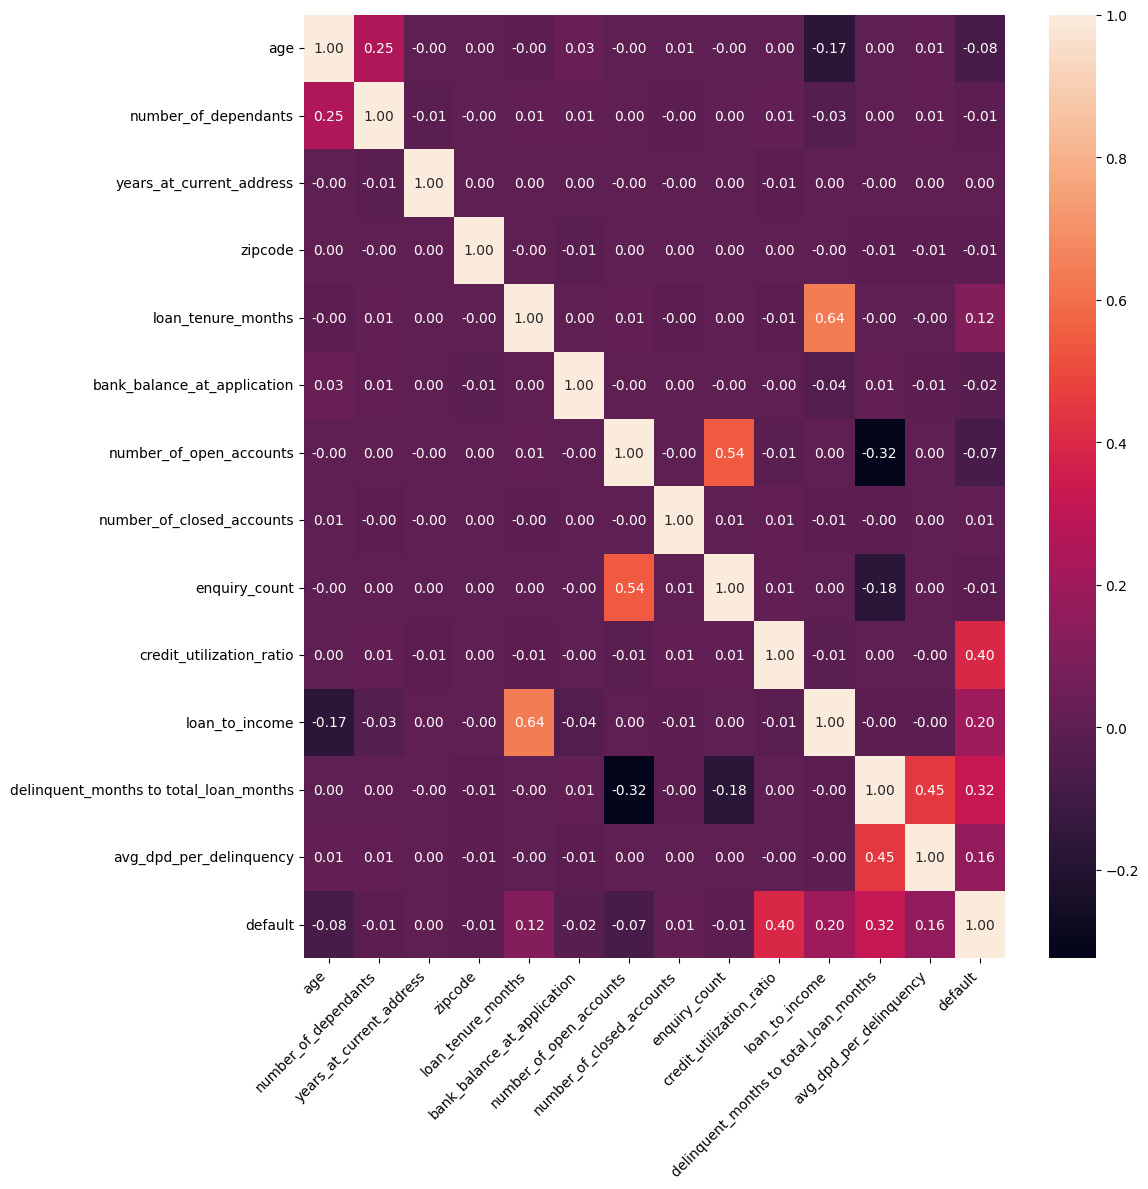

In [55]:
plt.figure(figsize=(12,12))
cm = df_train2[numeric_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

<h3>Weight of evidence (WOE) and Information Value (IV)</h3>

predictive power of categorial data

In [57]:
temp= pd.concat([X_train1, y_train], axis= 1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

count   sum
loan_purpose             
Auto           7447   327
Education      5620   559
Home          11304  1734
Personal      13117   603

In [58]:
def calc_woe_iv(df, feature, target):
    grouped= df.groupby(feature)[target].agg(['count', 'sum'])
    grouped= grouped.rename(columns= {'count' : 'total', 'sum': 'good'})
    grouped['bad']= grouped['total']- grouped['good']

    total_good= grouped['good'].sum()
    total_bad= grouped['bad'].sum()

    grouped['good_pct']= grouped['good'] / total_good
    grouped['bad_pct']= grouped['bad'] / total_bad
    grouped['woe']= np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv']= grouped['woe'] * (grouped['good_pct'] - grouped['bad_pct'])

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv= grouped['iv'].sum()
    return grouped, total_iv

grouped, total_iv= calc_woe_iv(pd.concat([X_train1, y_train], axis= 1), 'loan_purpose', 'default')
grouped

total  good    bad  good_pct  bad_pct   woe   iv
loan_purpose                                                  
Auto           7447   327   7120      0.10     0.21 -0.72 0.08
Education      5620   559   5061      0.17     0.15  0.16 0.00
Home          11304  1734   9570      0.54     0.28  0.66 0.17
Personal      13117   603  12514      0.19     0.37 -0.67 0.12

In [59]:
total_iv

np.float64(0.3691197842282755)

In [60]:
X_train1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months to total_loan_months', 'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
pd.cut(X_train1['loan_to_income'], bins= 10)

12746       (0.4, 0.5]
32495       (0.3, 0.4]
43675       (0.7, 0.8]
9040        (0.1, 0.2]
13077    (-0.001, 0.1]
             ...      
28515    (-0.001, 0.1]
5558        (0.1, 0.2]
45236       (0.7, 0.8]
49228       (0.2, 0.3]
37784       (0.1, 0.2]
Name: loan_to_income, Length: 37488, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [62]:

iv_dict= {}

for feature in X_train1.columns:
    if X_train1[feature].dtype == 'object':
        _, iv= calc_woe_iv(pd.concat([X_train1, y_train], axis= 1), feature, 'default')
    else: #for continous features
        X_binned= pd.cut(X_train1[feature], bins= 10, labels= False)
        _, iv= calc_woe_iv(pd.concat([X_binned, y_train], axis= 1), feature, 'default')
    iv_dict[feature] = iv   

iv_dict
    

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [63]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df= pd.DataFrame(list(iv_dict.items()), columns= ['feature', 'IV'])
iv_df= iv_df.sort_values(by= 'IV', ascending = False)
iv_df

feature    IV
17                credit_utilization_ratio 2.353
19  delinquent_months to total_loan_months 0.717
18                          loan_to_income 0.476
20                 avg_dpd_per_delinquency 0.402
10                            loan_purpose 0.369
5                           residence_type 0.247
12                      loan_tenure_months 0.219
11                               loan_type 0.163
0                                      age 0.089
14                 number_of_open_accounts 0.085
16                           enquiry_count 0.008
13             bank_balance_at_application 0.006
3                        employment_status 0.004
6                 years_at_current_address 0.002
4                     number_of_dependants 0.002
7                                     city 0.002
8                                    state 0.002
9                                  zipcode 0.002
15               number_of_closed_accounts 0.001
2                           marital_status 0.001
1                                   gender 0.000

In [64]:
selected_features_iv= [feature for feature, iv in iv_dict.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_months to total_loan_months',
 'avg_dpd_per_delinquency']

<h4>Feature Encoding</h4>

In [65]:
X_train2= X_train1[selected_features_iv]
X_test2= X_test[selected_features_iv]

X_train2.head()

In [66]:
X_train_encoded= pd.get_dummies(X_train2, drop_first= True)
X_test_encoded= pd.get_dummies(X_test2, drop_first= True)

X_train_encoded.head()

age  loan_tenure_months  number_of_open_accounts  \
12746 0.788               0.415                    1.000   
32495 0.500               0.830                    0.667   
43675 0.385               0.491                    0.000   
9040  0.462               0.642                    0.667   
13077 0.769               0.170                    0.000   

       credit_utilization_ratio  loan_to_income  \
12746                     0.364           0.415   
32495                     0.051           0.307   
43675                     0.000           0.759   
9040                      0.879           0.194   
13077                     0.717           0.047   

       delinquent_months to total_loan_months  avg_dpd_per_delinquency  \
12746                                   0.132                    0.590   
32495                                   0.062                    0.620   
43675                                   0.222                    0.560   
9040                                    0.000                    0.000   
13077                                   0.000                    0.000   

       residence_type_Owned  residence_type_Rented  loan_purpose_Education  \
12746                  True                  False                   False   
32495                  True                  False                    True   
43675                 False                  False                   False   
9040                  False                  False                    True   
13077                  True                  False                   False   

       loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured  
12746               True                  False                False  
32495              False                  False                False  
43675               True                  False                False  
9040               False                  False                False  
13077              False                   True                 True

<h3 align= 'center' style="color: green">Model Training</h3>

Attempt 1

1. Logistic Regression, RandomForest & XGB
2. No handling of class imbalance

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model= LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred= model.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



we here care about recall, High Recall

In [68]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred= model.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [69]:
from xgboost import XGBClassifier

model= XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred= model.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



In [70]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [71]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883672970285227
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.76      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.87      0.90      0.89     12497
weighted avg       0.96      0.96      0.96     12497



Attempt 2

1. LogisticRegression & XGB
2. Handle Class Imbalance Using Under Sampling

In [72]:
y_train.value_counts()

default
0    34265
1     3223
Name: count, dtype: int64

In [73]:
from imblearn.under_sampling import RandomUnderSampler

rus= RandomUnderSampler(random_state= 42)
X_train_rus, y_train_rus= rus.fit_resample(X_train_encoded, y_train)

y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [74]:
model= LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred= model.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [75]:
model= XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred= model.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



Attempt 3

1. LogisticRegression
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tunning unsing Optuna

In [76]:
from imblearn.combine import SMOTETomek

smt= SMOTETomek(random_state= 42)
X_train_smt, y_train_smt= smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()


default
0    34195
1    34195
Name: count, dtype: int64

In [77]:
model= LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred= model.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



<h4>Optuna Library</h4>

In [78]:
import optuna 
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [79]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-10-28 10:54:09,366] A new study created in memory with name: no-name-d56185a9-d4a4-458a-93db-16e55981f774
[I 2025-10-28 10:54:09,643] Trial 0 finished with value: 0.9464096585281069 and parameters: {'C': 2338.843103193671, 'solver': 'saga', 'tol': 0.034546109636807106, 'class_weight': None}. Best is trial 0 with value: 0.9464096585281069.
[I 2025-10-28 10:54:09,884] Trial 1 finished with value: 0.9012833058360165 and parameters: {'C': 0.0009318008558309195, 'solver': 'lbfgs', 'tol': 2.1640126767462212e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9464096585281069.
[I 2025-10-28 10:54:10,281] Trial 2 finished with value: 0.9454406493428268 and parameters: {'C': 0.7526961551468168, 'solver': 'lbfgs', 'tol': 7.462228870367951e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9464096585281069.
[I 2025-10-28 10:54:11,157] Trial 3 finished with value: 0.8485163153919077 and parameters: {'C': 0.0002205394575623794, 'solver': 'saga', 'tol': 1.63515257486

In [80]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9464096585281069
  Params: 
    C: 2338.843103193671
    solver: saga
    tol: 0.034546109636807106
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.54      0.95      0.69      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.82     12497
weighted avg       0.96      0.93      0.94     12497



Attemp 4

1. XGBoost
2. Handle Class imbalance Using SMOTETomek
3. Parameter tunning using Optuna

In [81]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-10-28 10:54:33,668] A new study created in memory with name: no-name-17f82646-fd12-48c8-84a9-8dafaa07d298
[I 2025-10-28 10:54:35,083] Trial 0 finished with value: 0.9513343418336794 and parameters: {'lambda': 0.010929591422435568, 'alpha': 0.11851536369655595, 'subsample': 0.9060647155361742, 'colsample_bytree': 0.9237734118428564, 'max_depth': 3, 'eta': 0.2017772349517008, 'gamma': 7.196877991663111, 'scale_pos_weight': 5.303299998383432, 'min_child_weight': 2, 'max_delta_step': 5}. Best is trial 0 with value: 0.9513343418336794.
[I 2025-10-28 10:54:37,205] Trial 1 finished with value: 0.9683028870242706 and parameters: {'lambda': 4.213466260377507, 'alpha': 0.27905108040456433, 'subsample': 0.49800206578196893, 'colsample_bytree': 0.936135116071581, 'max_depth': 7, 'eta': 0.26351418387096276, 'gamma': 2.4208972159735964, 'scale_pos_weight': 9.201928322567536, 'min_child_weight': 10, 'max_delta_step': 2}. Best is trial 1 with value: 0.9683028870242706.
[I 2025-10-28 10:54:38,9

In [82]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9738064899506789
  Params: 
    lambda: 0.02905846751737005
    alpha: 0.020224279790340475
    subsample: 0.4374570362777488
    colsample_bytree: 0.7743841649952741
    max_depth: 7
    eta: 0.25102983173932747
    gamma: 1.8189714558805592
    scale_pos_weight: 1.3586477635342369
    min_child_weight: 6
    max_delta_step: 2
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.72      0.87      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



LogisticRegression using SMOTETomek and Optuna gives better results

In [83]:
y_pred= best_model_logistic.predict(X_test_encoded)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.54      0.95      0.69      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.82     12497
weighted avg       0.96      0.93      0.94     12497



In [84]:
from sklearn.metrics import roc_curve, auc

proba= best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr, tpr, thresholds= roc_curve(y_test, proba)

In [85]:
area= auc(fpr, tpr)

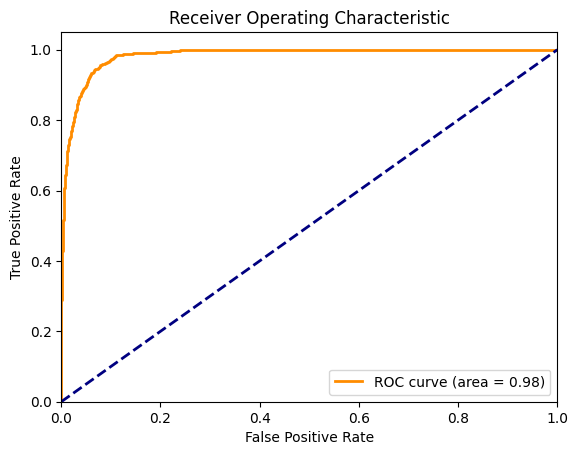

In [86]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<h3 align='center' style= "color: brown">Model Evaluation: Rankorder & KS Statistic</h3>

In [87]:
probabilities= best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval= pd.DataFrame({
    'Default Probability': probabilities,
    'Default Truth': y_test
})
df_eval.head(3)

Default Probability  Default Truth
19205                0.573              0
15514                0.000              0
30367                0.005              0

In [89]:
df_eval['decile']= pd.qcut(df_eval['Default Probability'], 10, labels= False, duplicates= 'drop')
df_eval.head(3)

Default Probability  Default Truth  decile
19205                0.573              0       8
15514                0.000              0       2
30367                0.005              0       6

In [90]:
df_grouped = df_eval.groupby('decile').apply(lambda x: pd.Series({
    'min_proba': x['Default Probability'].min(),
    'max_proba': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_grouped.reset_index(inplace=True)
df_grouped

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17168\3723704191.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_eval.groupby('decile').apply(lambda x: pd.Series({


decile  min_proba  max_proba  Events  Non-events
0       0      0.000      0.000   0.000    1250.000
1       1      0.000      0.000   0.000    1250.000
2       2      0.000      0.000   0.000    1249.000
3       3      0.000      0.000   0.000    1250.000
4       4      0.000      0.001   0.000    1250.000
5       5      0.001      0.003   0.000    1249.000
6       6      0.003      0.026   4.000    1246.000
7       7      0.026      0.213  10.000    1239.000
8       8      0.214      0.848 166.000    1084.000
9       9      0.848      1.000 894.000     356.000

In [91]:
df_grouped= df_grouped.sort_values(by= 'decile', ascending= False).reset_index(drop= True)
df_grouped

decile  min_proba  max_proba  Events  Non-events
0       9      0.848      1.000 894.000     356.000
1       8      0.214      0.848 166.000    1084.000
2       7      0.026      0.213  10.000    1239.000
3       6      0.003      0.026   4.000    1246.000
4       5      0.001      0.003   0.000    1249.000
5       4      0.000      0.001   0.000    1250.000
6       3      0.000      0.000   0.000    1250.000
7       2      0.000      0.000   0.000    1249.000
8       1      0.000      0.000   0.000    1250.000
9       0      0.000      0.000   0.000    1250.000

In [92]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
df_grouped['Non-event Rate'] = df_grouped['Non-events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
df_grouped

decile  min_proba  max_proba  Events  Non-events  Event Rate  \
0       9      0.848      1.000 894.000     356.000      71.520   
1       8      0.214      0.848 166.000    1084.000      13.280   
2       7      0.026      0.213  10.000    1239.000       0.801   
3       6      0.003      0.026   4.000    1246.000       0.320   
4       5      0.001      0.003   0.000    1249.000       0.000   
5       4      0.000      0.001   0.000    1250.000       0.000   
6       3      0.000      0.000   0.000    1250.000       0.000   
7       2      0.000      0.000   0.000    1249.000       0.000   
8       1      0.000      0.000   0.000    1250.000       0.000   
9       0      0.000      0.000   0.000    1250.000       0.000   

   Non-event Rate  
0          28.480  
1          86.720  
2          99.199  
3          99.680  
4         100.000  
5         100.000  
6         100.000  
7         100.000  
8         100.000  
9         100.000

almost 84% default cases are captured in first and second decile itself, It shows that model is really performing well
predictive power in differentiating between default and non- default is high

In [93]:
df_grouped['Cum Events'] =  df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] =  df_grouped['Non-events'].cumsum()
df_grouped

decile  min_proba  max_proba  Events  Non-events  Event Rate  \
0       9      0.848      1.000 894.000     356.000      71.520   
1       8      0.214      0.848 166.000    1084.000      13.280   
2       7      0.026      0.213  10.000    1239.000       0.801   
3       6      0.003      0.026   4.000    1246.000       0.320   
4       5      0.001      0.003   0.000    1249.000       0.000   
5       4      0.000      0.001   0.000    1250.000       0.000   
6       3      0.000      0.000   0.000    1250.000       0.000   
7       2      0.000      0.000   0.000    1249.000       0.000   
8       1      0.000      0.000   0.000    1250.000       0.000   
9       0      0.000      0.000   0.000    1250.000       0.000   

   Non-event Rate  Cum Events  Cum Non-events  
0          28.480     894.000         356.000  
1          86.720    1060.000        1440.000  
2          99.199    1070.000        2679.000  
3          99.680    1074.000        3925.000  
4         100.000    1074.000        5174.000  
5         100.000    1074.000        6424.000  
6         100.000    1074.000        7674.000  
7         100.000    1074.000        8923.000  
8         100.000    1074.000       10173.000  
9         100.000    1074.000       11423.000

In [94]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non-events'].sum()
df_grouped

decile  min_proba  max_proba  Events  Non-events  Event Rate  \
0       9      0.848      1.000 894.000     356.000      71.520   
1       8      0.214      0.848 166.000    1084.000      13.280   
2       7      0.026      0.213  10.000    1239.000       0.801   
3       6      0.003      0.026   4.000    1246.000       0.320   
4       5      0.001      0.003   0.000    1249.000       0.000   
5       4      0.000      0.001   0.000    1250.000       0.000   
6       3      0.000      0.000   0.000    1250.000       0.000   
7       2      0.000      0.000   0.000    1249.000       0.000   
8       1      0.000      0.000   0.000    1250.000       0.000   
9       0      0.000      0.000   0.000    1250.000       0.000   

   Non-event Rate  Cum Events  Cum Non-events  Cum Event Rate  \
0          28.480     894.000         356.000          83.240   
1          86.720    1060.000        1440.000          98.696   
2          99.199    1070.000        2679.000          99.628   
3          99.680    1074.000        3925.000         100.000   
4         100.000    1074.000        5174.000         100.000   
5         100.000    1074.000        6424.000         100.000   
6         100.000    1074.000        7674.000         100.000   
7         100.000    1074.000        8923.000         100.000   
8         100.000    1074.000       10173.000         100.000   
9         100.000    1074.000       11423.000         100.000   

   Cum Non-event Rate  
0               3.117  
1              12.606  
2              23.453  
3              34.361  
4              45.295  
5              56.237  
6              67.180  
7              78.114  
8              89.057  
9             100.000

In [95]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

decile  min_proba  max_proba  Events  Non-events  Event Rate  \
0       9      0.848      1.000 894.000     356.000      71.520   
1       8      0.214      0.848 166.000    1084.000      13.280   
2       7      0.026      0.213  10.000    1239.000       0.801   
3       6      0.003      0.026   4.000    1246.000       0.320   
4       5      0.001      0.003   0.000    1249.000       0.000   
5       4      0.000      0.001   0.000    1250.000       0.000   
6       3      0.000      0.000   0.000    1250.000       0.000   
7       2      0.000      0.000   0.000    1249.000       0.000   
8       1      0.000      0.000   0.000    1250.000       0.000   
9       0      0.000      0.000   0.000    1250.000       0.000   

   Non-event Rate  Cum Events  Cum Non-events  Cum Event Rate  \
0          28.480     894.000         356.000          83.240   
1          86.720    1060.000        1440.000          98.696   
2          99.199    1070.000        2679.000          99.628   
3          99.680    1074.000        3925.000         100.000   
4         100.000    1074.000        5174.000         100.000   
5         100.000    1074.000        6424.000         100.000   
6         100.000    1074.000        7674.000         100.000   
7         100.000    1074.000        8923.000         100.000   
8         100.000    1074.000       10173.000         100.000   
9         100.000    1074.000       11423.000         100.000   

   Cum Non-event Rate     KS  
0               3.117 80.124  
1              12.606 86.090  
2              23.453 76.175  
3              34.361 65.639  
4              45.295 54.705  
5              56.237 43.763  
6              67.180 32.820  
7              78.114 21.886  
8              89.057 10.943  
9             100.000  0.000

1. maximum value of KS must be in first three deciles
2. max KS value > 40%
3. In above model, max_KS = 86% (performing pretty well)


In [98]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836818493708419
Gini Coefficient: 0.9673636987416838


<h3>Feature Importance and Visualization</h3>

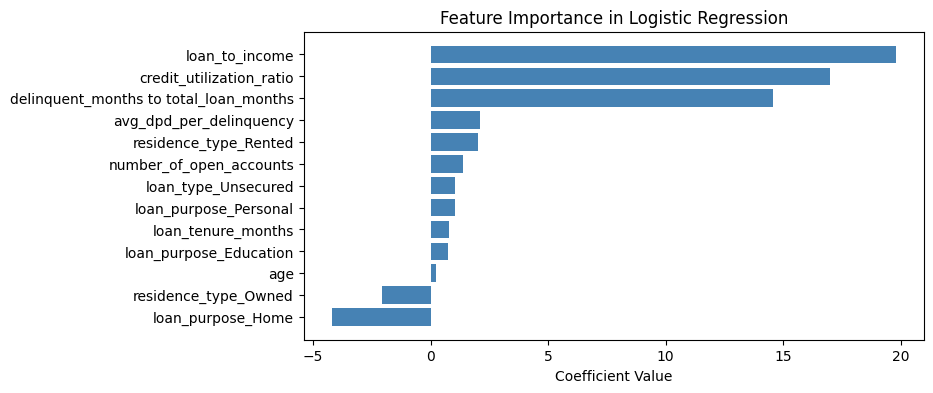

In [99]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

1. loan_to_income has max impact on the model

In [100]:
X_test_encoded.head(3)

age  loan_tenure_months  number_of_open_accounts  \
19205 0.346               0.755                    0.333   
15514 0.481               0.226                    1.000   
30367 0.231               0.547                    0.667   

       credit_utilization_ratio  loan_to_income  \
19205                     0.990           0.550   
15514                     0.323           0.220   
30367                     0.828           0.180   

       delinquent_months to total_loan_months  avg_dpd_per_delinquency  \
19205                                   0.000                    0.000   
15514                                   0.000                    0.000   
30367                                   0.000                    0.000   

       residence_type_Owned  residence_type_Rented  loan_purpose_Education  \
19205                  True                  False                   False   
15514                  True                  False                    True   
30367                  True                  False                   False   

       loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured  
19205               True                  False                False  
15514              False                  False                False  
30367              False                  False                False

In [101]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months to total_loan_months', 'avg_dpd_per_delinquency',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [102]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months to total_loan_months', 'avg_dpd_per_delinquency',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [104]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scale,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [105]:
final_model.coef_

array([[ 0.20641558,  0.7599415 ,  1.3716862 , 16.98336682, 19.78287556,
        14.55878627,  2.09195767, -2.06499303,  1.99729838,  0.738521  ,
        -4.20371146,  1.02622062,  1.02622062]])